In [41]:
import requests
import json
import pandas as pd
import numpy as np
import pickle
import os
from datetime import datetime
import joblib




In [200]:
base_url="https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/india/2022-01-01/2024-06-25?unitGroup=metric&include=days&key=JYMHZ8UAUG3HKY4PAZB9JMBHL&contentType=json"
# API_key=open("E:/weather forecasting/api _key","r").read()
# city_input=input("Enter the city name")
# url=base_url+"appid="+API_key+ "&q="+city_input
response=requests.get(base_url).json()
data=json.dumps(response,indent=4)
print(data)


{
    "queryCost": 907,
    "latitude": 28.631,
    "longitude": 77.2172,
    "resolvedAddress": "India",
    "address": "india",
    "timezone": "Asia/Kolkata",
    "tzoffset": 5.5,
    "days": [
        {
            "datetime": "2022-01-01",
            "datetimeEpoch": 1640975400,
            "tempmax": 19.5,
            "tempmin": 6.3,
            "temp": 11.9,
            "feelslikemax": 19.5,
            "feelslikemin": 6.0,
            "feelslike": 11.8,
            "dew": 8.3,
            "humidity": 80.7,
            "precip": 0.0,
            "precipprob": 0.0,
            "precipcover": 0.0,
            "preciptype": null,
            "snow": 0.0,
            "snowdepth": 0.0,
            "windgust": 19.8,
            "windspeed": 9.4,
            "winddir": 278.6,
            "pressure": 1022.1,
            "cloudcover": 9.7,
            "visibility": 1.4,
            "solarradiation": 165.9,
            "solarenergy": 14.3,
            "uvindex": 6.0,
            "sunrise

In [201]:
weather_data=[]
if "days" in response:
    for j in range(0,len(response["days"])):
        try:
            
        #fetching the useful data from the data json
            temp=response["days"][j]["temp"]
            temp_min=response["days"][j]["tempmin"]
            feels_like=response["days"][j]["feelslike"]
            temp_max=response["days"][j]["tempmax"]
            humidity=response["days"][j]["humidity"]
            Condition=response["days"][j]["conditions"]
            windspeed=response["days"][j]["windspeed"]
            date=response["days"][j]["datetime"]
            precipitation=response["days"][j]["precip"]
            pressure=response["days"][j]["pressure"]
            
            weather_info = {
                "date": date,
                "tempmax": temp_max,
                "tempmin": temp_min,
                "temp": temp,
                "feelslike": feels_like,
                "humidity": humidity,
                "windspeed":windspeed,
                "pressure":pressure,
                "precipitation":precipitation
            }
            
            weather_data.append(weather_info)
        except KeyError as e:
            print(f"KeyError : {e}")       
    df=pd.DataFrame(weather_data)

In [202]:
df

,date,tempmax,tempmin,temp,feelslike,humidity,windspeed,pressure,precipitation
0,2022-01-01,19.5,6.3,11.9,11.8,80.7,9.4,1022.1,0.000
1,2022-01-02,19.8,7.4,12.7,12.6,80.9,8.0,1020.7,0.000
2,2022-01-03,20.6,7.4,13.8,13.8,76.1,13.0,1018.6,0.000
3,2022-01-04,22.5,9.7,15.8,15.8,71.1,7.6,1017.7,0.000
4,2022-01-05,15.0,12.2,13.7,13.7,91.8,22.3,1016.6,7.674
...,...,...,...,...,...,...,...,...,...
902,2024-06-21,38.0,27.0,31.9,36.3,60.4,14.8,999.4,3.588
903,2024-06-22,38.6,29.0,33.2,38.1,55.7,16.6,999.4,0.000
904,2024-06-23,39.1,30.0,33.5,40.4,59.3,18.4,1000.1,1.480
905,2024-06-24,37.0,30.0,33.0,40.7,65.1,18.4,999.5,0.000


In [203]:
df.to_csv("data.csv")

In [204]:
print(df.shape)
print(df.info())


(907, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           907 non-null    object 
 1   tempmax        907 non-null    float64
 2   tempmin        907 non-null    float64
 3   temp           907 non-null    float64
 4   feelslike      907 non-null    float64
 5   humidity       907 non-null    float64
 6   windspeed      907 non-null    float64
 7   pressure       907 non-null    float64
 8   precipitation  907 non-null    float64
dtypes: float64(8), object(1)
memory usage: 63.9+ KB
None


In [205]:
df["date"]=pd.to_datetime(df["date"])
df["day"]=df["date"].dt.day
df["month"]=df["date"].dt.month
df["year"]=df["date"].dt.year
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           907 non-null    datetime64[ns]
 1   tempmax        907 non-null    float64       
 2   tempmin        907 non-null    float64       
 3   temp           907 non-null    float64       
 4   feelslike      907 non-null    float64       
 5   humidity       907 non-null    float64       
 6   windspeed      907 non-null    float64       
 7   pressure       907 non-null    float64       
 8   precipitation  907 non-null    float64       
 9   day            907 non-null    int32         
 10  month          907 non-null    int32         
 11  year           907 non-null    int32         
dtypes: datetime64[ns](1), float64(8), int32(3)
memory usage: 74.5 KB


In [206]:
df

,date,tempmax,tempmin,temp,feelslike,humidity,windspeed,pressure,precipitation,day,month,year
0,2022-01-01,19.5,6.3,11.9,11.8,80.7,9.4,1022.1,0.000,1,1,2022
1,2022-01-02,19.8,7.4,12.7,12.6,80.9,8.0,1020.7,0.000,2,1,2022
2,2022-01-03,20.6,7.4,13.8,13.8,76.1,13.0,1018.6,0.000,3,1,2022
3,2022-01-04,22.5,9.7,15.8,15.8,71.1,7.6,1017.7,0.000,4,1,2022
4,2022-01-05,15.0,12.2,13.7,13.7,91.8,22.3,1016.6,7.674,5,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
902,2024-06-21,38.0,27.0,31.9,36.3,60.4,14.8,999.4,3.588,21,6,2024
903,2024-06-22,38.6,29.0,33.2,38.1,55.7,16.6,999.4,0.000,22,6,2024
904,2024-06-23,39.1,30.0,33.5,40.4,59.3,18.4,1000.1,1.480,23,6,2024
905,2024-06-24,37.0,30.0,33.0,40.7,65.1,18.4,999.5,0.000,24,6,2024


In [207]:
corr=df.corr()
corr

,date,tempmax,tempmin,temp,feelslike,humidity,windspeed,pressure,precipitation,day,month,year
date,1.000000,0.041898,0.013631,0.031372,0.008224,-0.128322,-0.059132,0.091153,-0.054009,0.022713,0.097801,0.924598
tempmax,0.041898,1.000000,0.890762,0.974737,0.894975,-0.702101,0.321149,-0.803240,-0.074390,0.016648,0.151627,-0.016734
tempmin,0.013631,0.890762,1.000000,0.965109,0.974836,-0.394296,0.343699,-0.899923,0.048806,0.012651,0.225497,-0.071975
temp,0.031372,0.974737,0.965109,1.000000,0.957631,-0.587320,0.344720,-0.871660,-0.019839,0.009193,0.179205,-0.037101
feelslike,0.008224,0.894975,0.974836,0.957631,1.000000,-0.376682,0.309565,-0.904861,0.015927,0.018763,0.234512,-0.080832
humidity,-0.128322,-0.702101,-0.394296,-0.587320,-0.376682,1.000000,-0.248398,0.310586,0.268204,0.032712,0.108111,-0.166524
windspeed,-0.059132,0.321149,0.343699,0.344720,0.309565,-0.248398,1.000000,-0.380877,0.119379,0.045871,-0.147899,-0.001467
pressure,0.091153,-0.803240,-0.899923,-0.871660,-0.904861,0.310586,-0.380877,1.000000,-0.110453,-0.035343,-0.120554,0.133693
precipitation,-0.054009,-0.074390,0.048806,-0.019839,0.015927,0.268204,0.119379,-0.110453,1.000000,0.033968,0.042529,-0.069149
day,0.022713,0.016648,0.012651,0.009193,0.018763,0.032712,0.045871,-0.035343,0.033968,1.000000,0.010207,-0.014177


In [208]:
corr["temp"].sort_values(ascending=False)

temp             1.000000
tempmax          0.974737
tempmin          0.965109
feelslike        0.957631
windspeed        0.344720
month            0.179205
date             0.031372
day              0.009193
precipitation   -0.019839
year            -0.037101
humidity        -0.587320
pressure        -0.871660
Name: temp, dtype: float64

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

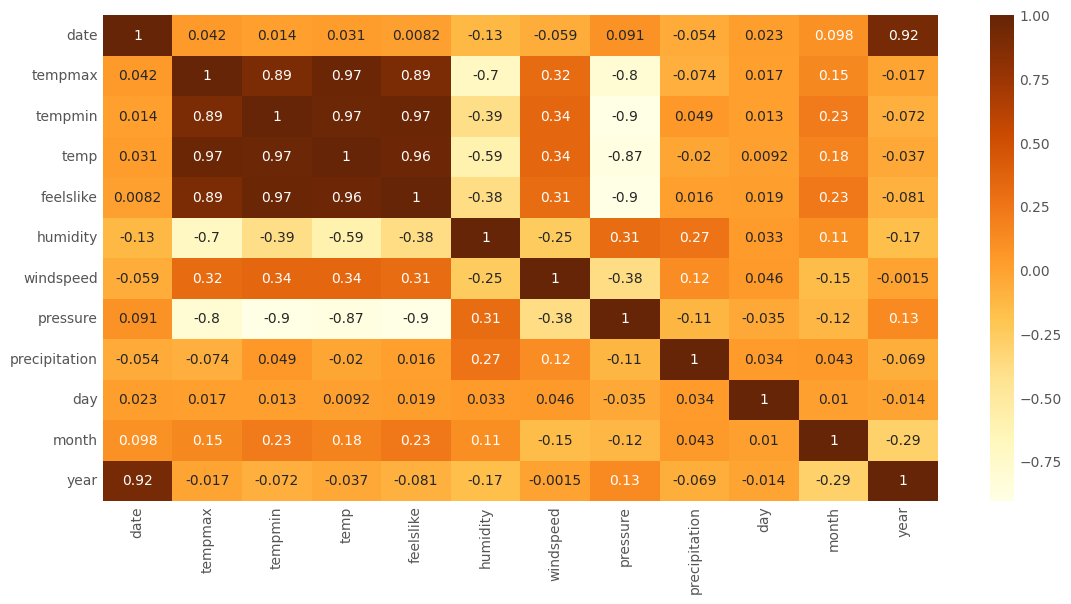

In [210]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap="YlOrBr")
plt.show()

In [211]:
df.isnull().sum()

date             0
tempmax          0
tempmin          0
temp             0
feelslike        0
humidity         0
windspeed        0
pressure         0
precipitation    0
day              0
month            0
year             0
dtype: int64

In [212]:
df.columns

Index(['date', 'tempmax', 'tempmin', 'temp', 'feelslike', 'humidity',
       'windspeed', 'pressure', 'precipitation', 'day', 'month', 'year'],
      dtype='object')

In [213]:
df_datetime=df.set_index("date")
df_datetime.head()

,tempmax,tempmin,temp,feelslike,humidity,windspeed,pressure,precipitation,day,month,year
date,,,,,,,,,,,
2022-01-01,19.5,6.3,11.9,11.8,80.7,9.4,1022.1,0.000,1,1,2022
2022-01-02,19.8,7.4,12.7,12.6,80.9,8.0,1020.7,0.000,2,1,2022
2022-01-03,20.6,7.4,13.8,13.8,76.1,13.0,1018.6,0.000,3,1,2022
2022-01-04,22.5,9.7,15.8,15.8,71.1,7.6,1017.7,0.000,4,1,2022
2022-01-05,15.0,12.2,13.7,13.7,91.8,22.3,1016.6,7.674,5,1,2022


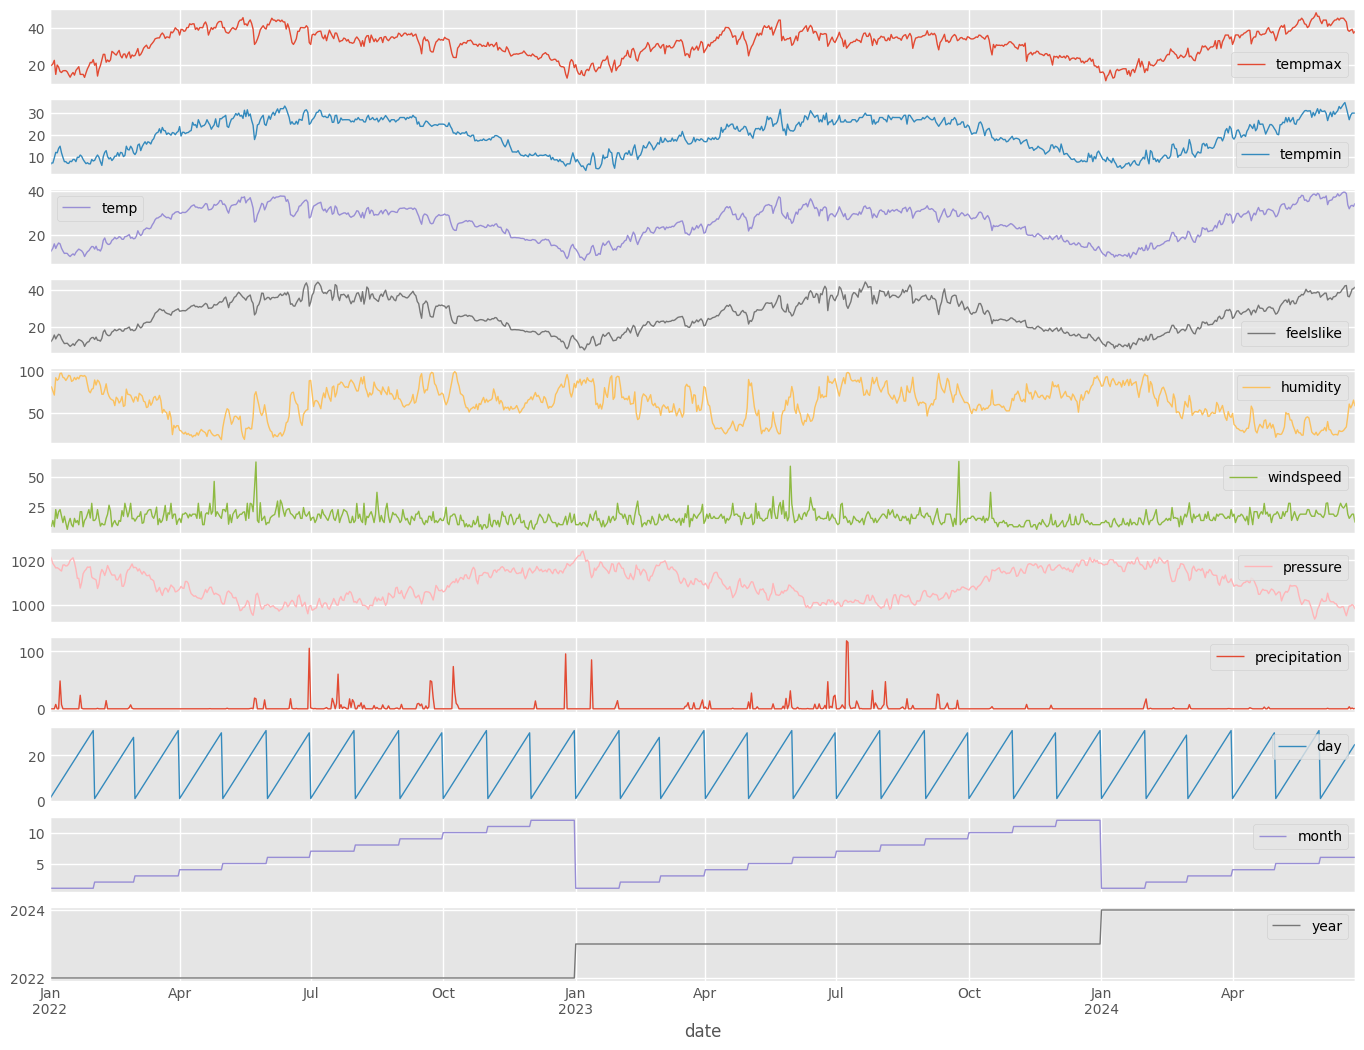

In [215]:
df_datetime.plot(subplots=True, layout=(len(df_datetime.columns), 1), figsize=(15, 12), sharex=True,lw=1)
plt.show()

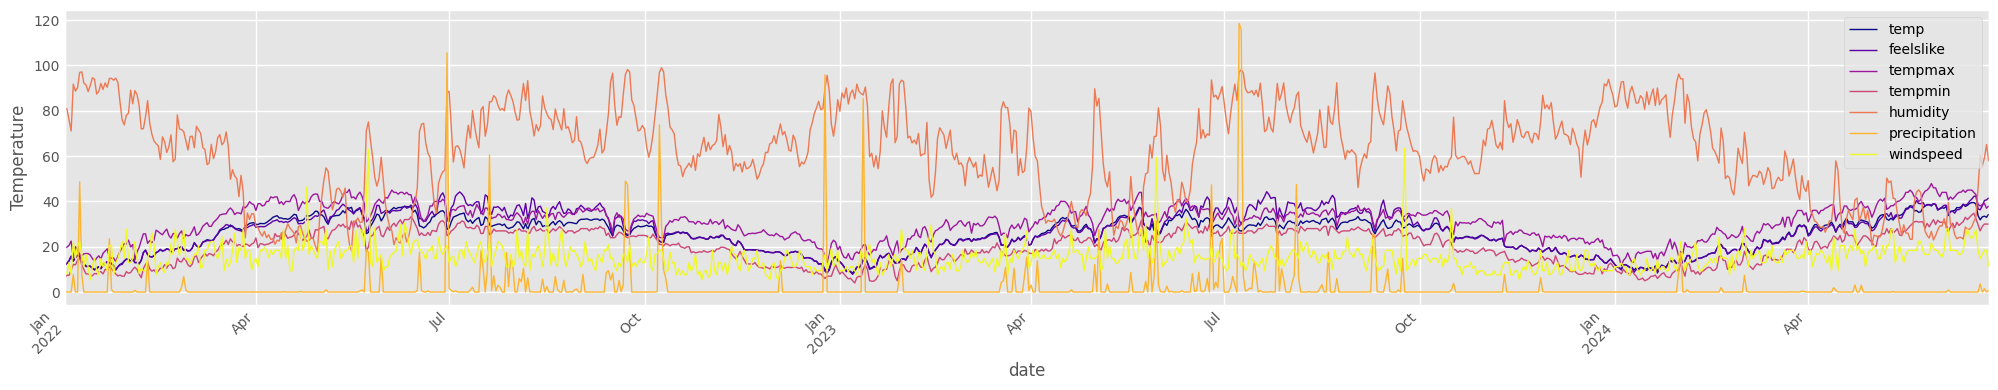

In [217]:
df_datetime.plot(y=["temp","feelslike","tempmax","tempmin","humidity","precipitation","windspeed"],figsize=(20,4),cmap="plasma",lw=1)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.ylabel("Temperature")

plt.legend(loc="best")

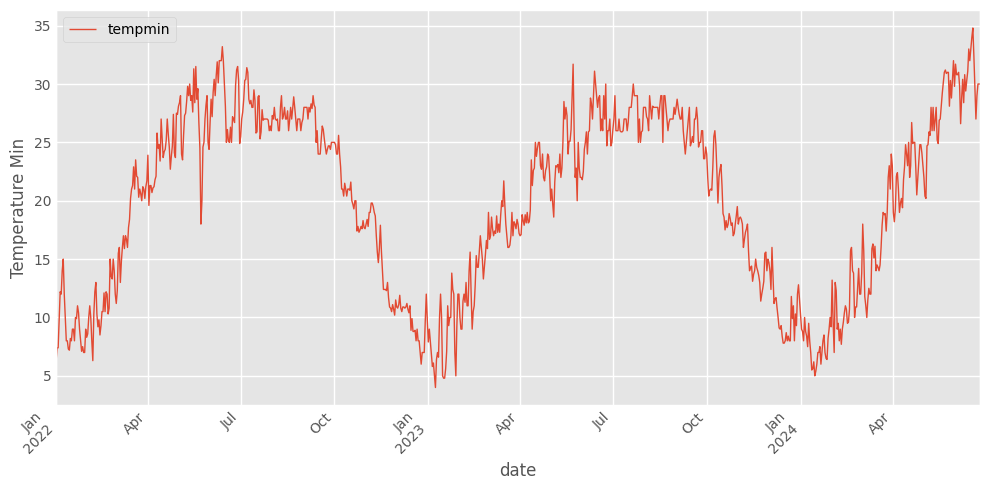

In [218]:
plt.style.use("ggplot")
df_datetime.plot(y="tempmin",figsize=(10,5),lw=1)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.ylabel("Temperature Min")

plt.legend(loc="best")

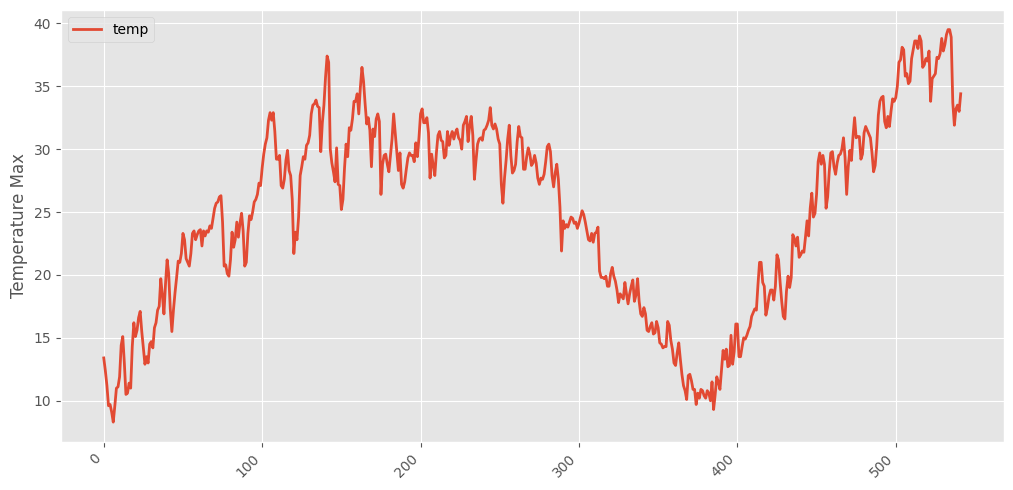

In [27]:
plt.style.use("ggplot")
df["temp"].plot(figsize=(10,5),lw=2)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.ylabel("Temperature Max")

plt.legend(loc="best")

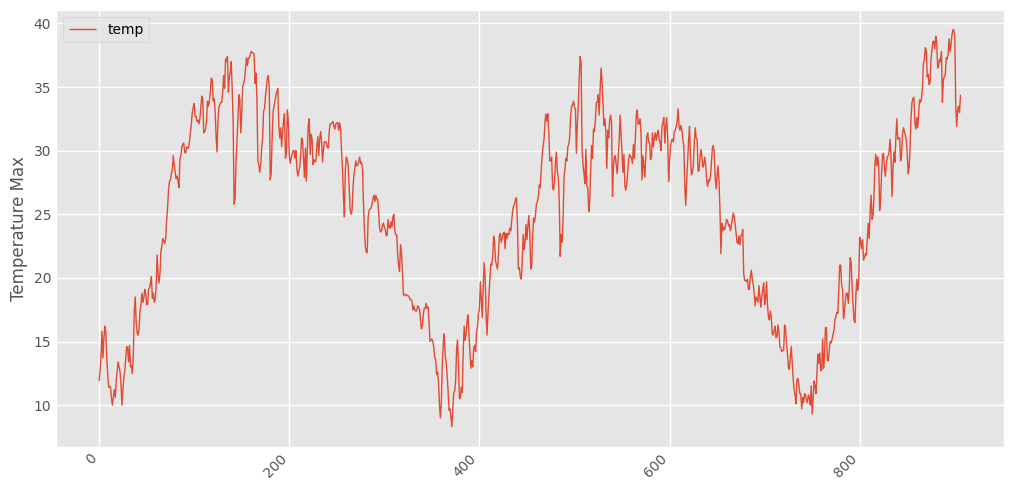

In [220]:
df.plot(y="temp",figsize=(10,5),lw=1)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.ylabel("Temperature Max")

plt.legend(loc="best")

In [221]:
#creating the list for each feature
X0=[] #day
X1=[] #month
X2=[] #year
X3=[] #tempmax
X4=[] #tempmin
X5=[] #feelslike
X6=[] #humidity
X7=[] #windspeed
X8=[] #pressure
X9=[] #precipitation
X10=[] #temperature
y=[] #temperature
for i in range(0,df.shape[0]-30):
    X0.append(df.iloc[i:i+30,9])
    X1.append(df.iloc[i:i+30,10])
    X2.append(df.iloc[i:i+30,11])
    X3.append(df.iloc[i:i+30,1])
    X4.append(df.iloc[i:i+30,2])
    X5.append(df.iloc[i:i+30,4])
    X6.append(df.iloc[i:i+30,5])
    X7.append(df.iloc[i:i+30,6])
    X8.append(df.iloc[i:i+30,7])
    X9.append(df.iloc[i:i+30,8])
    X10.append(df.iloc[i:i+30,3])
    y.append(df.iloc[i+30,3])

In [222]:
len(X5)

877

In [225]:
X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,y=np.array(X0),np.array(X1),np.array(X2),np.array(X3),np.array(X4),np.array(X5),np.array(X6),np.array(X7),np.array(X8),np.array(X9),np.array(X10),np.array(y)


In [224]:
y.shape,X5.shape


((877,), (877, 30))

In [386]:
y=np.reshape(y,(len(y),1))
y.shape

(877, 1)

In [227]:
#scaling the data 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X0=scaler.fit_transform(X0)
X1=scaler.fit_transform(X1)
X2=scaler.fit_transform(X2)
X3=scaler.fit_transform(X3)
X4=scaler.fit_transform(X4)
X5=scaler.fit_transform(X5)
X6=scaler.fit_transform(X6)
X7=scaler.fit_transform(X7)
X8=scaler.fit_transform(X8)
X9=scaler.fit_transform(X9)
X10=scaler.fit_transform(X10)

y=scaler.fit_transform(y)





In [228]:
joblib.dump(scaler,"scaler.joblib")

['scaler.joblib']

In [229]:
X0

array([[0.        , 0.03333333, 0.06666667, ..., 0.9       , 0.93333333,
        0.96666667],
       [0.03333333, 0.06666667, 0.1       , ..., 0.93333333, 0.96666667,
        1.        ],
       [0.06666667, 0.1       , 0.13333333, ..., 0.96666667, 1.        ,
        0.        ],
       ...,
       [0.76666667, 0.8       , 0.83333333, ..., 0.63333333, 0.66666667,
        0.7       ],
       [0.8       , 0.83333333, 0.86666667, ..., 0.66666667, 0.7       ,
        0.73333333],
       [0.83333333, 0.86666667, 0.9       , ..., 0.7       , 0.73333333,
        0.76666667]])

In [387]:
print(X0.shape)
print(X1.shape)

(877, 30)
(877, 30)


In [388]:
X=np.stack([X0,X1,X2,X10],axis=2)
X.shape

(877, 30, 4)

In [389]:
X_train,X_test=X[:500],X[500:]
y_train,y_test=y[:500],y[500:]
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)


(500, 30, 4)
(500, 1)
(377, 1)
(377, 30, 4)


Building the LSTM model

In [351]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,CSVLogger
from tensorflow.keras.optimizers import SGD
from keras import Sequential,layers
from keras.layers import Dropout,Dense,LSTM,Bidirectional
from keras.regularizers import l2

tf.random.set_seed(4)

In [183]:
callback=[
    # EarlyStopping(monitor="val_loss",patience=20,restore_best_weights=True,verbose=1,mode="min"),
    CSVLogger("logs.csv",separator=",",append=False)
]

In [401]:
model= Sequential()
model.add(Bidirectional(LSTM(units=128,return_sequences=True,input_shape = (X_train.shape[1],X_train.shape[2]),kernel_regularizer=l2(0.01))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units= 64,return_sequences=True,kernel_regularizer=l2(0.01))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units= 32 , return_sequences=False,kernel_regularizer=l2(0.01))))
model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(units= 30,return_sequences=False,kernel_regularizer=l2(0.01))))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(units= 30,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(units= 30,return_sequences=False)))
# model.add(Dropout(0.3))
model.add(Dense(units = 25,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

e:\weather forecasting\weatherforecast\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [402]:
model.compile(optimizer="adam", loss='mean_squared_error',metrics=['mae'])

In [403]:
model.fit(X_train,y_train, epochs=50,validation_split=0.2,callbacks=callback)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - loss: 7.4266 - mae: 0.3249 - val_loss: 5.7508 - val_mae: 0.1392
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 5.3219 - mae: 0.1338 - val_loss: 4.0962 - val_mae: 0.1062
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 3.7786 - mae: 0.1178 - val_loss: 2.8748 - val_mae: 0.1041
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 2.6463 - mae: 0.1107 - val_loss: 1.9950 - val_mae: 0.0898
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 1.8352 - mae: 0.1054 - val_loss: 1.3784 - val_mae: 0.0948
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 1.2698 - mae: 0.1090 - val_loss: 0.9507 - val_mae: 0.0991
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.8787 - mae: 0.1133 - val_loss: 0.6563 - val_mae: 0.0952
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.6031 - mae: 0.0978 - val_loss: 0.4529 - val_mae: 0.0852
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.4

In [348]:
model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_84                │ (None, 30, 256)        │       136,192 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_117 (Dropout)           │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_85                │ (None, 30, 128)        │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_118 (Dropout)           │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_86                │ (None, 30, 64)         │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_119 (Dropout)           │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_87                │ (None, 30, 60)         │        22,800 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_120 (Dropout)           │ (None, 30, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_88                │ (None, 30, 60)         │        21,840 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_121 (Dropout)           │ (None, 30, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_89                │ (None, 60)             │        21,840 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_122 (Dropout)           │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 25)             │         1,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_123 (Dropout)           │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,229,375 (4.69 MB)

 Trainable params: 409,791 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 819,584 (3.13 MB)

In [404]:
model.evaluate(X_train,y_train)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0074 - mae: 0.0624


[0.007967358455061913, 0.06533286720514297]

In [405]:
model.evaluate(X_test,y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0065 - mae: 0.0570


[0.008365132845938206, 0.0656588152050972]

In [523]:
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)
predictions.shape

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


(377, 1)

In [407]:
pred=model.predict(X_train)
pred=scaler.inverse_transform(pred)
pred

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[14.053533 ],
       [14.078636 ],
       [14.184906 ],
       [14.344655 ],
       [14.416265 ],
       [14.4887295],
       [14.522363 ],
       [14.618538 ],
       [14.902096 ],
       [15.266974 ],
       [15.474308 ],
       [15.6022   ],
       [15.691111 ],
       [15.796902 ],
       [15.99357  ],
       [16.20457  ],
       [16.459263 ],
       [16.614801 ],
       [16.768976 ],
       [16.96885  ],
       [17.098125 ],
       [17.084211 ],
       [17.049429 ],
       [17.137434 ],
       [17.214174 ],
       [17.323307 ],
       [17.461275 ],
       [17.352129 ],
       [17.28628  ],
       [17.122158 ],
       [17.368845 ],
       [17.730656 ],
       [18.336771 ],
       [18.727444 ],
       [18.965555 ],
       [19.296524 ],
       [19.939108 ],
       [20.573153 ],
       [21.220182 ],
       [21.731895 ],
       [22.138268 ],
       [22.553719 ],
       [23.153502 ],
       [23.822815 ],
       [24.592491 ],
       [25.311922 ],
       [25.893343 ],
       [26.42

### Plotting the prediction and y_train values

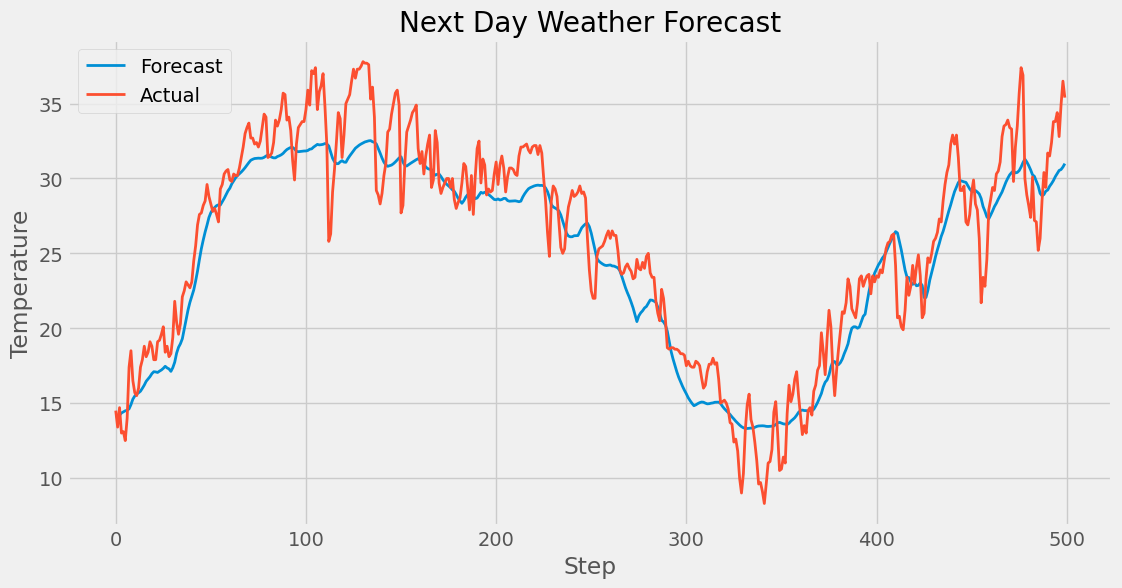

In [408]:
plt.figure(figsize=(12,6))
plt.style.use("fivethirtyeight")
plt.title("Next Day Weather Forecast")
plt.xlabel("Step")
plt.ylabel("Temperature")
plt.plot(pred,lw=2)
plt.plot(scaler.inverse_transform(y_train),lw=2)
plt.legend(["Forecast","Actual"])


### Plotting prediction and y_test values

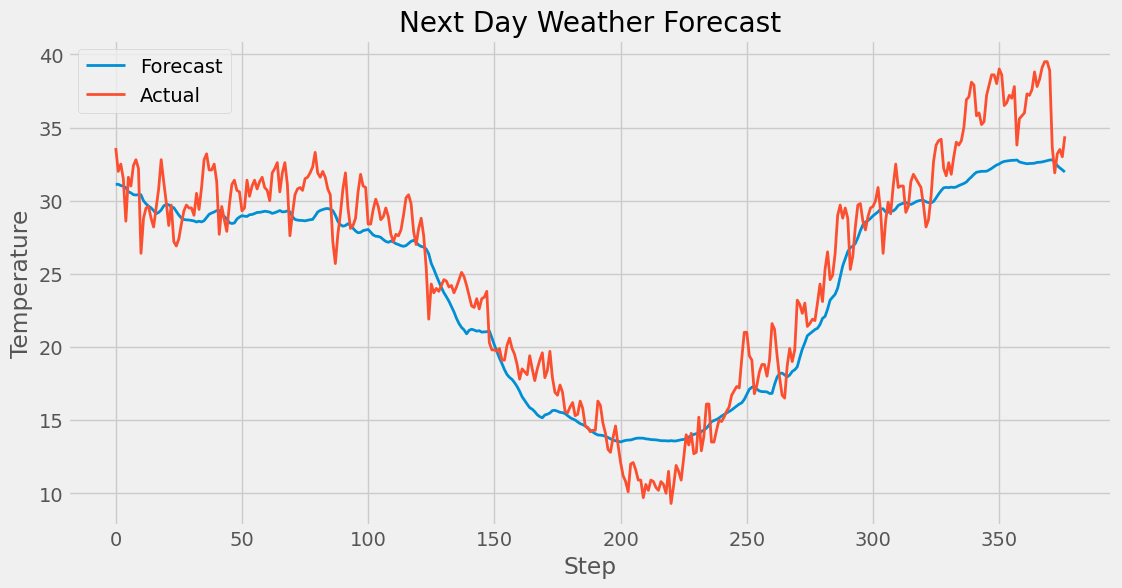

In [409]:
plt.figure(figsize=(12,6))
plt.style.use("fivethirtyeight")
plt.title("Next Day Weather Forecast")
plt.xlabel("Step")
plt.ylabel("Temperature")
plt.plot(predictions,lw=2)
plt.plot(scaler.inverse_transform(y_test),lw=2)
plt.legend(["Forecast","Actual"])


In [48]:
X0.shape

(512, 30)

In [55]:
X.shape

(853, 30, 5)

In [410]:
metrics=pd.read_csv("logs.csv")

In [479]:
metrics.head()

,epoch,loss,mae,val_loss,val_mae
0,0,6.945078,0.240927,5.750785,0.139216
1,1,4.986574,0.134927,4.096196,0.106192
2,2,3.528077,0.113380,2.874793,0.104118
3,3,2.467157,0.114814,1.994952,0.089757
4,4,1.707874,0.101371,1.378403,0.094781


#### Visualising Metics

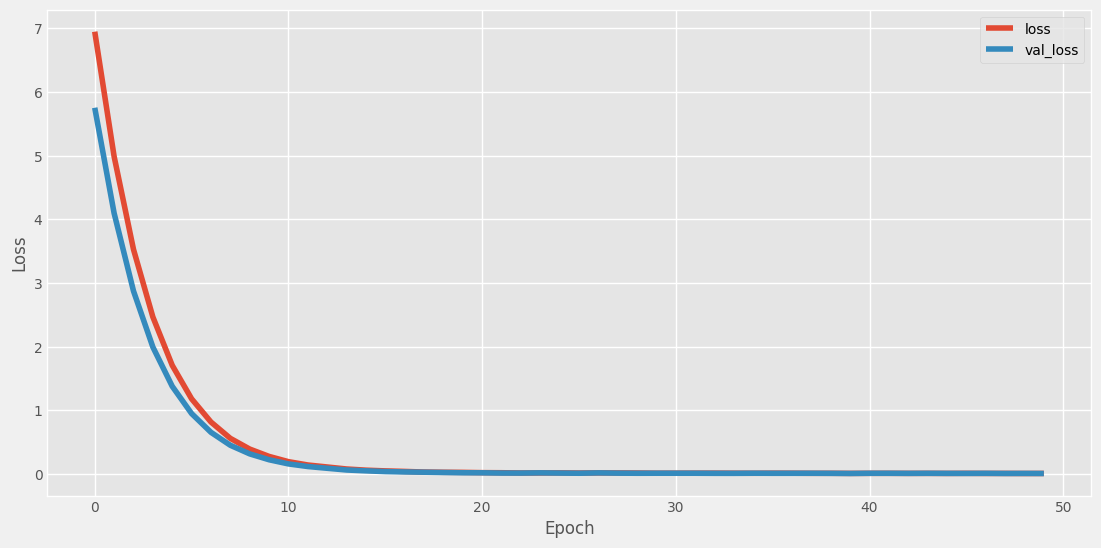

In [412]:
plt.figure(figsize=(12,6))
plt.style.use("ggplot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(metrics["loss"],label="loss")
plt.plot(metrics["val_loss"],label="val_loss")
plt.legend(loc="best")


#### Saving the model and transformation file

In [413]:
model.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_101               │ (None, 30, 256)        │       136,192 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_138 (Dropout)           │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_102               │ (None, 30, 128)        │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_139 (Dropout)           │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_103               │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_140 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_141 (Dropout)           │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,030,235 (3.93 MB)

 Trainable params: 343,411 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 686,824 (2.62 MB)

In [522]:
model.save("LSTM model.keras")

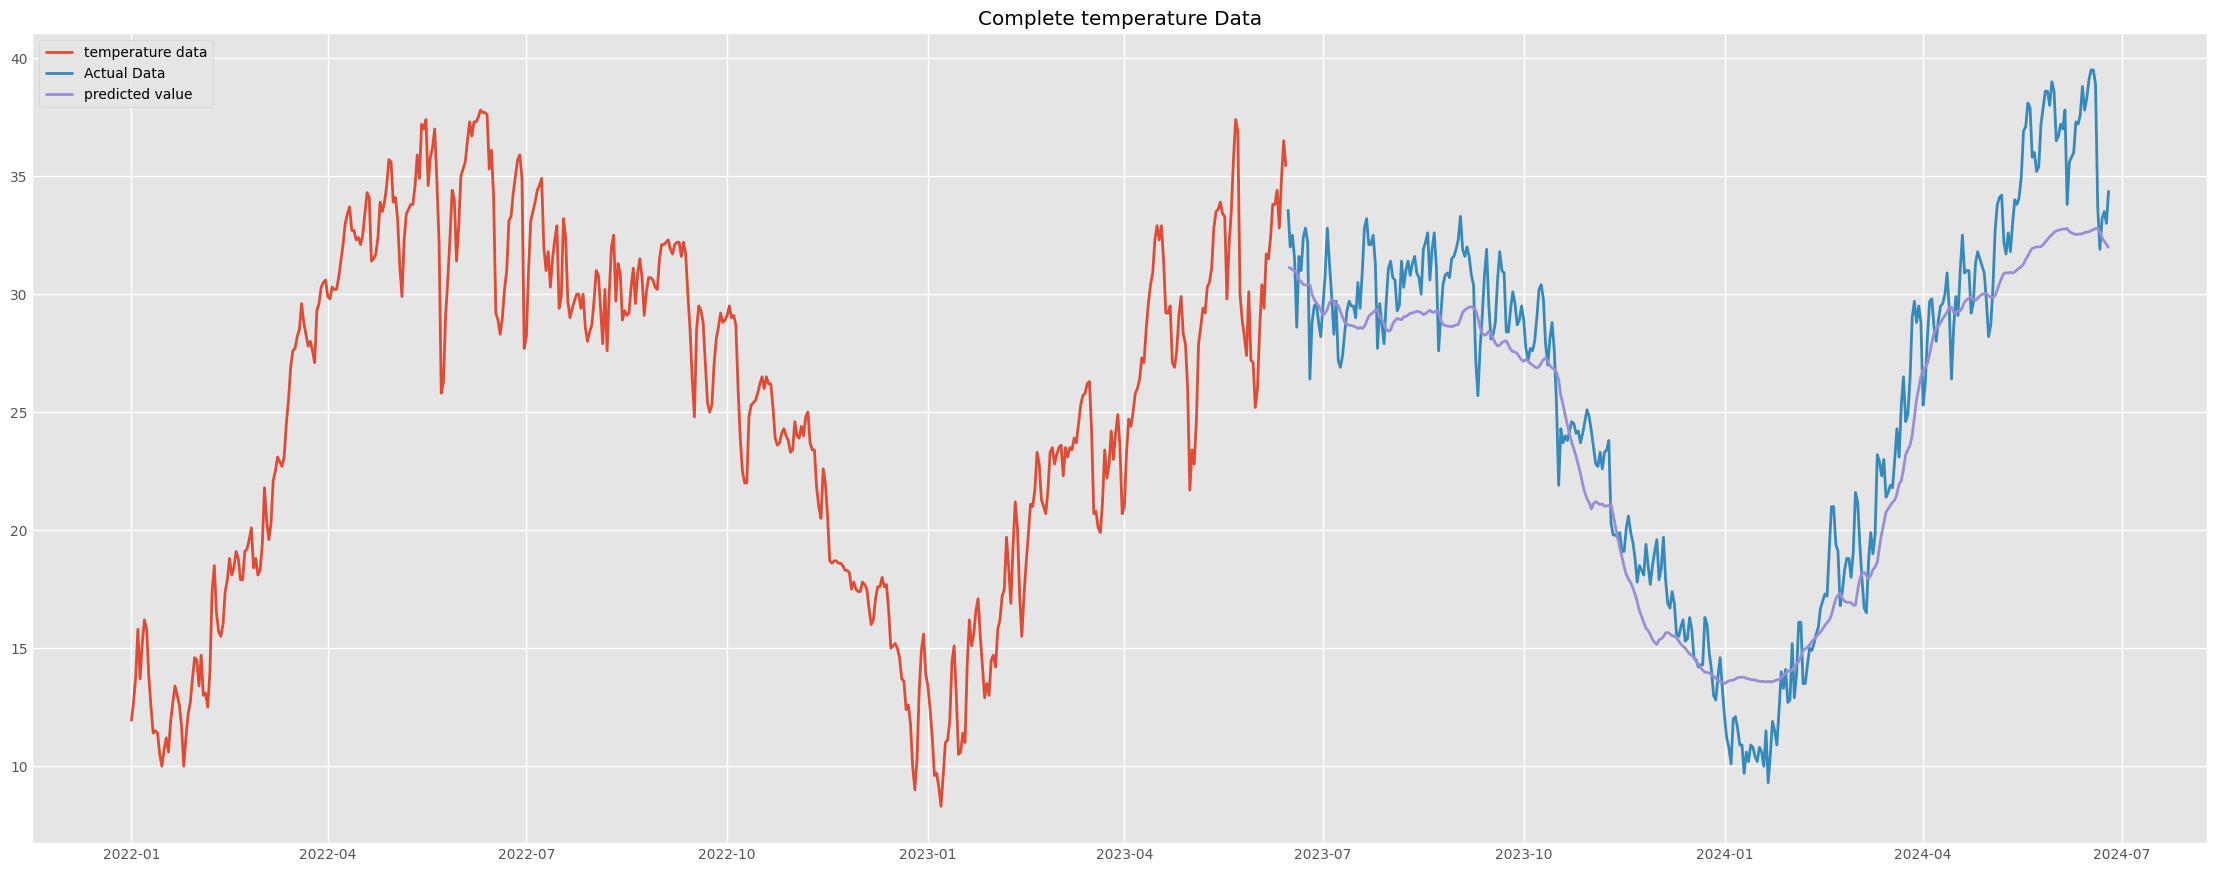

In [527]:
y_test_inv=scaler.inverse_transform(y_test)
inv_y_train=scaler.inverse_transform(y_train)
inv_X10=scaler.inverse_transform(X10)
plotting_data=pd.DataFrame({
    "y_test values":y_test_inv.reshape(-1),
    "y_test_pred":predictions.reshape(-1)
},
    index=df_datetime.index[500 + 30:]
)
plotting_data

whole_df=pd.concat([df_datetime["temp"][:530],plotting_data],axis=0)
whole_df.head().fillna(0)

plt.figure(figsize=(25,10))
plt.title("Complete temperature Data")
plt.plot(whole_df,lw=2)
# plt.plot(inv_y_train,lw=2)
# plt.plot(df_datetime["temp"],lw=2)
# plt.plot(scaler.inverse_transform(y)[:50],lw=2)
# plt.plot(pd.DataFrame(inv_predictions),lw=2)
plt.legend(["temperature data","Actual Data","predicted value"],loc="best")

plt.show()

In [530]:
plotting_data

,y_test values,y_test_pred
date,,
2023-06-15,33.6,31.115843
2023-06-16,32.0,31.119972
2023-06-17,32.5,31.032017
2023-06-18,31.5,30.991974
2023-06-19,28.6,30.888699
...,...,...
2024-06-21,31.9,32.624199
2024-06-22,33.2,32.397419
2024-06-23,33.5,32.240231


In [529]:
df_datetime["temp"][:500]

date
2022-01-01    11.9
2022-01-02    12.7
2022-01-03    13.8
2022-01-04    15.8
2022-01-05    13.7
              ... 
2023-05-11    31.1
2023-05-12    32.8
2023-05-13    33.5
2023-05-14    33.6
2023-05-15    33.9
Name: temp, Length: 500, dtype: float64